In [129]:
import pandas as pd #biblioteca para manipulação de dados
import numpy as np #biblioteca para utilizacao de vetores e matrizes
import matplotlib.pyplot as plt #bibloteca para plotar graficos
# importar train_test_split do scikitlearn 
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, auc, roc_curve, davies_bouldin_score, mutual_info_score, silhouette_samples, silhouette_score, cluster
from sklearn.cluster import KMeans

In [130]:
#lê os arquivos
df_SVN_blood = pd.read_csv('/content/drive/My Drive/Colab Notebooks/IGTI/mod3/trabalho-pratico/bloodtransf.csv')
df_rl_diabetes = pd.read_csv('/content/drive/My Drive/Colab Notebooks/IGTI/mod3/trabalho-pratico/diabetes_numeric.csv')
df_kmeans_wine = pd.read_csv('/content/drive/My Drive/Colab Notebooks/IGTI/mod3/trabalho-pratico/wine.csv')


In [131]:
#Imprimir a quantidade de teatures (colunas) e instãncias (linhas de cada dataset)
print(f"df_SVN_blood => Quantidade de features {df_SVN_blood.shape[1]} e instâncias {df_SVN_blood.shape[0]} => {df_SVN_blood.shape}")
print(f"df_rl_diabetes => Quantidade de features {df_rl_diabetes.shape[1]} e instâncias {df_rl_diabetes.shape[0]} => {df_rl_diabetes.shape}")
print(f"df_kmeans_wine => Quantidade de features {df_kmeans_wine.shape[1]} e instâncias {df_kmeans_wine.shape[0]} => {df_kmeans_wine.shape}")

df_SVN_blood => Quantidade de features 5 e instâncias 748 => (748, 5)
df_rl_diabetes => Quantidade de features 3 e instâncias 43 => (43, 3)
df_kmeans_wine => Quantidade de features 14 e instâncias 178 => (178, 14)


In [132]:
## Identificar a existência de dados faltantes
print("Classificação SVN Transfusão de sangue ")
print(df_SVN_blood.info())
print("regressão Logistica de diabetes")
print(df_rl_diabetes.info())
print("Classificação KMEANS de Vinhos")
print(df_kmeans_wine.info())
#### 

Classificação SVN Transfusão de sangue 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   V1      748 non-null    int64
 1   V2      748 non-null    int64
 2   V3      748 non-null    int64
 3   V4      748 non-null    int64
 4   Class   748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB
None
regressão Logistica de diabetes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        43 non-null     float64
 1   deficit    43 non-null     float64
 2   c_peptide  43 non-null     float64
dtypes: float64(3)
memory usage: 1.1 KB
None
Classificação KMEANS de Vinhos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                          Non-Null Count 

In [133]:
## Identificar a existência de dados daltantes
print("Classificação SVN Transfusão de sangue ")
print(df_SVN_blood.describe())
print("regressão Logistica de diabetes")
print(df_rl_diabetes.describe())
print("Classificação KMEANS de Vinhos")
print(df_kmeans_wine.describe())
#### 

Classificação SVN Transfusão de sangue 
               V1          V2            V3          V4       Class
count  748.000000  748.000000    748.000000  748.000000  748.000000
mean     9.506684    5.514706   1378.676471   34.282086    1.237968
std      8.095396    5.839307   1459.826781   24.376714    0.426124
min      0.000000    1.000000    250.000000    2.000000    1.000000
25%      2.750000    2.000000    500.000000   16.000000    1.000000
50%      7.000000    4.000000   1000.000000   28.000000    1.000000
75%     14.000000    7.000000   1750.000000   50.000000    1.000000
max     74.000000   50.000000  12500.000000   98.000000    2.000000
regressão Logistica de diabetes
             age    deficit  c_peptide
count  43.000000  43.000000  43.000000
mean    9.032558  -8.148837   4.746512
std     4.022539   7.123080   0.720565
min     0.900000 -29.000000   3.000000
25%     5.500000 -12.700000   4.450000
50%    10.400000  -7.800000   4.900000
75%    11.850000  -2.000000   5.100000
max 

In [134]:
df_SVN_blood.head(10)


,V1,V2,V3,V4,Class
0,2,50,12500,98,2
1,0,13,3250,28,2
2,1,16,4000,35,2
3,2,20,5000,45,2
4,1,24,6000,77,1
5,4,4,1000,4,1
6,2,7,1750,14,2
7,1,12,3000,35,1
8,2,9,2250,22,2
9,5,46,11500,98,2


In [135]:
df_rl_diabetes.head(10)


,age,deficit,c_peptide
0,5.2,-8.1,4.8
1,8.8,-16.1,4.1
2,10.5,-0.9,5.2
3,10.6,-7.8,5.5
4,10.4,-29.0,5.0
5,1.8,-19.2,3.4
6,12.7,-18.9,3.4
7,15.6,-10.6,4.9
8,5.8,-2.8,5.6
9,1.9,-25.0,3.7


In [136]:
print(df_kmeans_wine.head(10))
print(df_kmeans_wine.columns)
print(df_kmeans_wine['class'].is_unique)
print(df_kmeans_wine['class'].count())
print(df_kmeans_wine['class'].value_counts())

   class  Alcohol  Malic_acid  ...   Hue  OD280%2FOD315_of_diluted_wines  Proline
0      1    14.23        1.71  ...  1.04                            3.92     1065
1      1    13.20        1.78  ...  1.05                            3.40     1050
2      1    13.16        2.36  ...  1.03                            3.17     1185
3      1    14.37        1.95  ...  0.86                            3.45     1480
4      1    13.24        2.59  ...  1.04                            2.93      735
5      1    14.20        1.76  ...  1.05                            2.85     1450
6      1    14.39        1.87  ...  1.02                            3.58     1290
7      1    14.06        2.15  ...  1.06                            3.58     1295
8      1    14.83        1.64  ...  1.08                            2.85     1045
9      1    13.86        1.35  ...  1.01                            3.55     1045

[10 rows x 14 columns]
Index(['class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash',
     

In [137]:
## Somente ajusta a coluna class para que seja 0, 1, 2 e não 1, 2, 3
def ajustaClasse(val):
  return val - 1

df_kmeans_wine['class'] = df_kmeans_wine['class'].apply(lambda x : ajustaClasse(x))

print(df_kmeans_wine['class'].value_counts())


1    71
0    59
2    48
Name: class, dtype: int64


In [138]:
#### Separando os dados em treino e teste.

#Classificação usando o SVN
train_X_SVN_blood, test_X_SVN_blood, train_Y_SVN_blood, test_Y_SVN_blood = train_test_split(np.array(df_SVN_blood[['V1','V2','V3','V4']]), np.array(df_SVN_blood['Class']), test_size = 0.25, random_state = 42)


## regressão linear 
train_X_rl_diabetes, test_X_rl_diabetes, train_Y_rl_diabetes, test_Y_rl_diabetes = train_test_split(np.array(df_rl_diabetes[['age','deficit']]), np.array(df_rl_diabetes['c_peptide']), test_size = 0.25, random_state = 42)


## classificação de vinhos com o KMeans
train_X_kmeans_wine, test_X_kmeans_wine, train_Y_kmeans_wine, test_Y_kmeans_wine = train_test_split(np.array(df_kmeans_wine[df_kmeans_wine.columns[1:]]), np.array(df_kmeans_wine[df_kmeans_wine.columns[0]]), test_size = 0.25, random_state = 42)



In [139]:
print(len(train_X_kmeans_wine), len(train_X_kmeans_wine[0]))
print(train_X_kmeans_wine)

133 13
[[1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 [1.208e+01 2.080e+00 1.700e+00 ... 1.270e+00 2.960e+00 7.100e+02]
 [1.242e+01 4.430e+00 2.730e+00 ... 9.200e-01 3.120e+00 3.650e+02]
 ...
 [1.438e+01 1.870e+00 2.380e+00 ... 1.200e+00 3.000e+00 1.547e+03]
 [1.269e+01 1.530e+00 2.260e+00 ... 9.600e-01 2.060e+00 4.950e+02]
 [1.234e+01 2.450e+00 2.460e+00 ... 8.000e-01 3.380e+00 4.380e+02]]


Coefficients: 
 [0.07101794 0.0353591 ]
Intercept: 
 4.343657046568842
R2: 0.2188
MAE: 0.6107422323514548
MSE: 0.4745


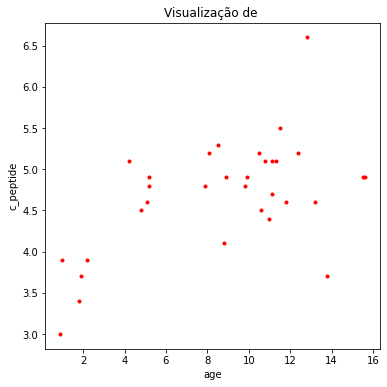

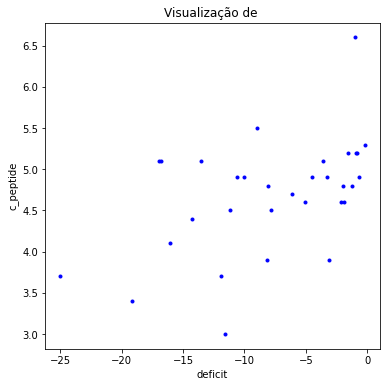

Index(['age', 'deficit'], dtype='object')


In [140]:
## regressão linear da diabetes
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(train_X_rl_diabetes, train_Y_rl_diabetes)

# Make predictions using the testing set
pred_train_Y_rl_diabetes = regr.predict(train_X_rl_diabetes)
pred_test_Y_rl_diabetes = regr.predict(test_X_rl_diabetes)

# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
# The coefficient of determination: 1 is perfect prediction
print('R2: %.4f' % r2_score(test_Y_rl_diabetes, pred_test_Y_rl_diabetes))
print ('MAE:', metrics.mean_absolute_error(test_Y_rl_diabetes, pred_test_Y_rl_diabetes))
# The mean squared error
print('MSE: %.4f' % mean_squared_error(test_Y_rl_diabetes, pred_test_Y_rl_diabetes))

columns = df_rl_diabetes.columns
colors = ['red', 'blue', 'black', 'orange']
pos = 0
for i in columns[:-1]:
  plt.figure(figsize=(6,6))
  plt.plot(train_X_rl_diabetes[:,pos], train_Y_rl_diabetes, '.', color=colors[pos % len(colors)])
  pos += 1
  plt.xlabel(i)
  plt.ylabel(columns[-1])
  plt.title("Visualização de ")
  plt.show()

##  plt.figure(figsize=(10,10))
##  plt.plot(train_X_rl_diabetes[:,1], train_Y_rl_diabetes, '*', color='blue')
##)
## plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)


columns = df_rl_diabetes.columns[:-1]
print(columns)
##for col in columns
  # Plot outputs
##  plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
##  plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

##  plt.xticks(())
##  plt.yticks(())

##  plt.show()

f1 (teste) =  0.8553846153846154
f1 (treino) =  0.8710659898477157
Recall =  0.9953596287703016
Precision =  0.7743682310469314
Acurácia =  0.7486631016042781
AUROC =  0.5104166666666666


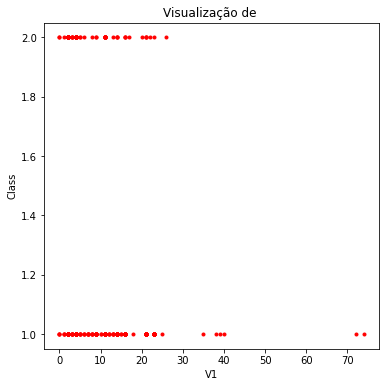

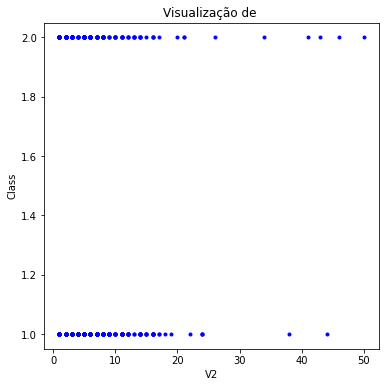

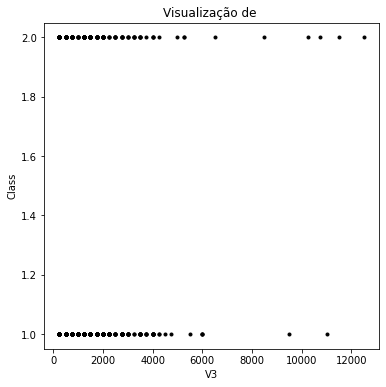

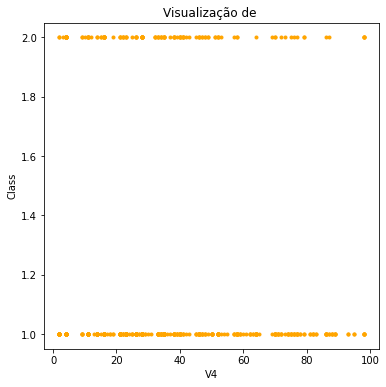

In [141]:
## Fez a classificação usando o SVN

svc = SVC(kernel='rbf')

# Train the model using the training sets
svc.fit(train_X_SVN_blood, train_Y_SVN_blood)

pred_train_Y_SVN_blood = svc.predict (train_X_SVN_blood)
pred_test_Y_SVN_blood = svc.predict (test_X_SVN_blood)

diff_train = pred_train_Y_SVN_blood - train_Y_SVN_blood
diff_test = pred_test_Y_SVN_blood - test_Y_SVN_blood

diff_test = diff_test ** 2
diff_train = diff_train ** 2

## Avaliar as métricas Acurácia, Precision, Recall, F1 e AUROC

print("f1 (teste) = ",f1_score(test_Y_SVN_blood, pred_test_Y_SVN_blood))

print("f1 (treino) = ",f1_score(train_Y_SVN_blood, pred_train_Y_SVN_blood))
print("Recall = ",recall_score(train_Y_SVN_blood, pred_train_Y_SVN_blood))
print("Precision = ",precision_score(train_Y_SVN_blood, pred_train_Y_SVN_blood))


## acurácia
acuracia = test_Y_SVN_blood == pred_test_Y_SVN_blood
print ("Acurácia = ", acuracia.sum() / len(test_Y_SVN_blood))

fpr, tpr, thresholds = metrics.roc_curve(test_Y_SVN_blood, pred_test_Y_SVN_blood, pos_label=2)
print("AUROC = ", metrics.auc(fpr, tpr))

columns = df_SVN_blood.columns
colors = ['red', 'blue', 'black', 'orange']
pos = 0
for i in columns[:-1]:
  plt.figure(figsize=(6,6))
  plt.plot(train_X_SVN_blood[:,pos], train_Y_SVN_blood, '.', color=colors[pos % len(colors)])
  pos += 1
  plt.xlabel(i)
  plt.ylabel(columns[-1])
  plt.title("Visualização de ")
  plt.show()





n =  2 --- Inércia =  3180882.546622191 --- Coeficiente de Silhueta =  0.6420626105479827 --- Davies-Bouldin Score =  0.5009476567689258 --- Mutual information =  0.6365141682948124

n =  3 --- Inércia =  1615357.3439364806 --- Coeficiente de Silhueta =  0.5519241838976592 --- Davies-Bouldin Score =  0.5415115100039725 --- Mutual information =  0.526053317723497

n =  4 --- Inércia =  904619.1816381103 --- Coeficiente de Silhueta =  0.5574577694095691 --- Davies-Bouldin Score =  0.5422186226154052 --- Mutual information =  0.6209931213798954

n =  5 --- Inércia =  642882.1872523668 --- Coeficiente de Silhueta =  0.5919602431822734 --- Davies-Bouldin Score =  0.4949779199680628 --- Mutual information =  0.6038484017945244

n =  6 --- Inércia =  453741.3438071916 --- Coeficiente de Silhueta =  0.5298178972424419 --- Davies-Bouldin Score =  0.4831705448343893 --- Mutual information =  0.720522771612546

n =  7 --- Inércia =  299755.2991185357 --- Coeficiente de Silhueta =  0.5747078435338

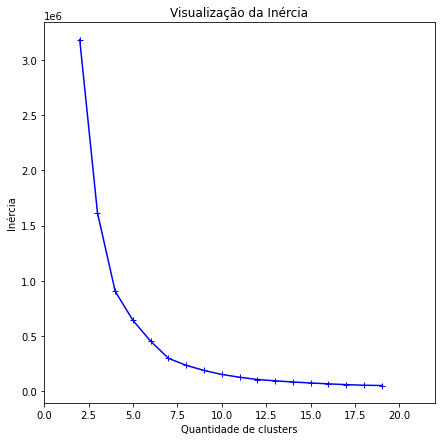

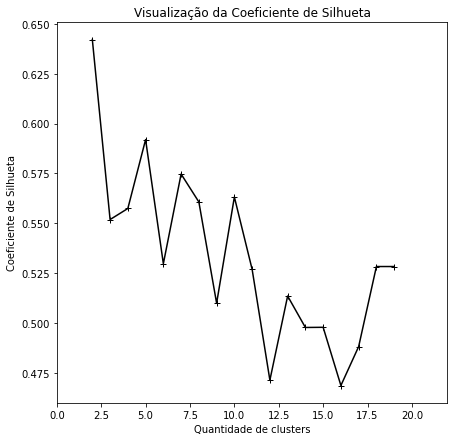

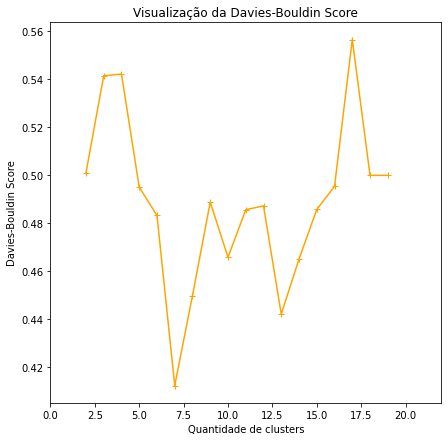

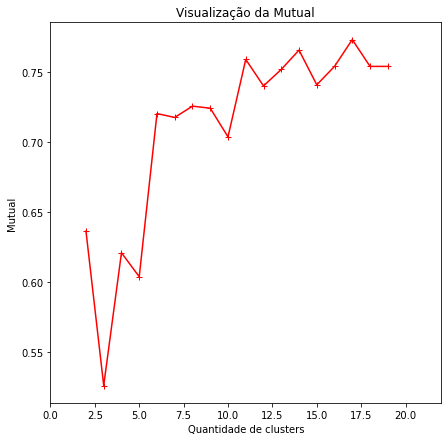

In [142]:
##clustering = KMeans(n_clusters = 4, random_state=42)
 
# treinando o modelo no conjunto de dados de treino
## clustering.fit(train_X_kmeans_wine);


# importar biblioteca para calculo de métricas


# Avaliando o baseline!
# essas medidas são calculadas a partir da comparação com o valor real do nosso conjunto de teste

## Fez a classificação usando o KMeans.

def calculate_wcss(data_train, data_test, data_y_test, max):
    n_val = []
    inertia = []
    silhouette = []
    davies_bouldin = []
    multual = []
    ## wcss = []
    for n in range(2, max, 1):
        kmeans = KMeans(n_clusters=n, random_state=42)
        kmeans.fit(X=data_train)
        labels_test = kmeans.predict(X=data_test)
        silhouette_coef = metrics.silhouette_score(data_test, labels_test)
        davies_bouldin_coef = davies_bouldin_score(data_test, labels_test)
        m = mutual_info_score(labels_test, data_y_test)
        print("n = ", n , end=' --- ')
        n_val.append(n)
        print("Inércia = ", kmeans.inertia_, end=' --- ')
        inertia.append(kmeans.inertia_)
        print('Coeficiente de Silhueta = ',silhouette_coef , end=' --- ') 
        silhouette.append(silhouette_coef)
        print('Davies-Bouldin Score = ', davies_bouldin_coef , end=' --- ') 
        davies_bouldin.append(davies_bouldin_coef)        
        multual.append(m)
        print('Mutual information = ', m )
        print('')

    wcss = [n_val, inertia , silhouette, davies_bouldin, multual]

    return wcss


def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

max_clusters = 20

calcs = calculate_wcss (train_X_kmeans_wine, test_X_kmeans_wine, test_Y_kmeans_wine, max_clusters)

colors = ['red', 'blue', 'black', 'orange']
metricas = ['Inércia','Coeficiente de Silhueta','Davies-Bouldin Score', 'Mutual']
pos = 0
for i in metricas:
  pos += 1
  plt.figure(figsize=(7,7))
  plt.plot(calcs[0], calcs[pos], '-', color=colors[pos % len(colors)], marker='+')
  plt.xlabel("Quantidade de clusters")
  plt.ylabel(i)
  plt.title("Visualização da " + i)
  ## plt.step( x = [k for k in range(1,max_clusters+2,1)])
  plt.xlim(0,max_clusters+2)
